In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [23]:
p_out = xr.load_dataset('data/h3_uniform_29381_2010-01-05_out(1).nc')

In [24]:
p_out

<xarray.Dataset>
Dimensions:     (obs: 11, traj: 29381)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 ... 2.938e+04 2.938e+04
    time        (traj, obs) datetime64[ns] 2010-01-05T12:00:00 ... 2010-01-15...
    lat         (traj, obs) float64 3.583 3.875 4.157 ... 6.798 6.883 6.895
    lon         (traj, obs) float64 -108.5 -108.3 -108.1 ... 101.7 101.6 101.4
    z           (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev26+gac79a95c
    parcels_mesh:           spherical

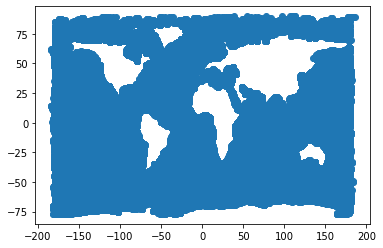

In [26]:
plt.scatter(p_out['lon'], p_out['lat'])

In [205]:
X, Y = np.meshgrid(range(-180, 180, 5), range(-90, 91, 5))

In [207]:
x_range = X[0]
y_range = Y[:, 0]

In [208]:
lon_indx = np.digitize(p_out['lon'][:,0], X[0])
lat_indx = np.digitize(p_out['lat'][:,0], Y[:, 0])

In [209]:
xx = -30.65
yy = -30.65

In [210]:
xloc = np.digitize(xx, x_range)
yloc = np.digitize(yy, y_range)

In [229]:
C = (lon_indx == xloc) & (lat_indx == yloc)

In [231]:
index = np.where(C)[0]

In [232]:
index

array([ 1370,  1808,  2849,  3214,  3494,  3823,  4215,  5477,  5797,
        6799,  7901,  7904,  8226,  9612, 10321, 10597, 11214, 12195,
       13022, 14264, 14327, 14406, 14549])

In [263]:
# p_out.where(p_out['trajectory'].astype(int)==index)
p_out.where(p_out['trajectory'].isin(index), drop=True)

<xarray.Dataset>
Dimensions:     (obs: 11, traj: 23)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 1.37e+03 1.37e+03 ... 1.455e+04 1.455e+04
    time        (traj, obs) datetime64[ns] 2010-01-05T12:00:00 ... 2010-01-15...
    lat         (traj, obs) float64 -33.03 -33.09 -33.15 ... -35.15 -35.16
    lon         (traj, obs) float64 -33.53 -33.47 -33.47 ... -34.65 -34.58
    z           (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev26+gac79a95c
    parcels_mesh:           spherical

In [309]:
def output_refinery(data, X, Y, x, y):
    """
    The function selects the trajectories of the particles that are inside a grid cell
    at the start of the simulation and drops the particles from the xarray dataset. 
    
    Parameters
    ----------
    data: xarray dataset
        Specifically built for parcels outputs with variables 'trajectory', 'lat', and 'lon'
    X, Y: Either a meshgrid 2D or a 1D array
        Contians the coordinates of the grid.
    x, y: float
        Position 
    Returns
    -------
    data_relevant: xarray dataset
        xrray with containing the particles that are in a grid cell at the start of the simulation.
    """
    
    if len(X.shape) == 2:
        x_range = X[0]
        y_range = Y[:, 0]
        
    elif len(X.shape) == 1:
        x_range = X
        y_range = Y
    
    lons = data['lon'][:,0]
    lats = data['lat'][:,0]
    
    lon_idx = np.digitize(lons, x_range)
    lat_idx = np.digitize(lats, y_range)
    
    xloc_idx = np.digitize(x, x_range)
    yloc_idx = np.digitize(x, x_range)
    
    intersection = (lon_idx == xloc_idx) & (lat_idx == yloc_idx)
    index = np.where(intersection)[0]

    data_relevant = data.where(data['trajectory'].isin(index), drop=True)
    
    return data_relevant   

In [290]:
res = 5
X, Y = np.meshgrid(range(-180, 180, res), range(-90, 91, res))

In [311]:
output_refinery(p_out, np.linspace(-180, 180, 50), np.linspace(-90, 91, 50), xx, yy)

<xarray.Dataset>
Dimensions:     (obs: 11, traj: 27)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 408.0 408.0 408.0 ... 1.552e+04 1.552e+04
    time        (traj, obs) datetime64[ns] 2010-01-05T12:00:00 ... 2010-01-15...
    lat         (traj, obs) float64 -12.7 -12.69 -12.69 ... -13.27 -13.3 -13.33
    lon         (traj, obs) float64 -29.9 -30.02 -30.12 ... -29.92 -30.06 -30.19
    z           (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev26+gac79a95c
    parcels_mesh:           spherical

In [291]:
a_new = output_refinery(p_out, X, Y, xx, yy)

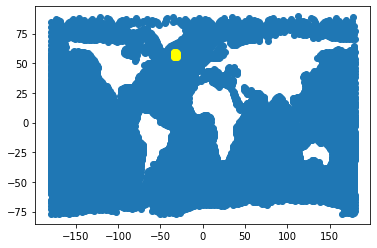

In [292]:
plt.scatter(p_out['lon'][:,0], p_out['lat'][:,0])
plt.scatter(a_new['lon'][:,0], a_new['lat'][:,0], c='yellow')

In [293]:
a_new.dims['obs']

11

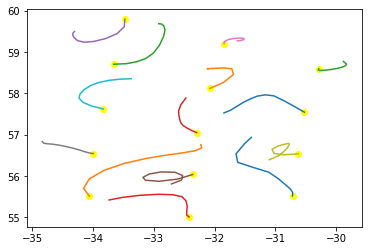

In [294]:
plt.scatter(a_new['lon'][:,0], a_new['lat'][:,0], c='yellow')
for i in range(a_new.dims['traj']):
    plt.plot(a_new['lon'][i], a_new['lat'][i]);